In [2]:
import zipfile
import os

def unpack_zip(zip_file, extract_to):
    # Create a ZipFile object
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        # Extract all the contents of the zip file into the specified directory
        zip_ref.extractall(extract_to)

# Example usage:
zip_file = 'titanic.zip'  # Path to your zip file
extract_to = 'Data/'  # Directory where you want to extract the contents

# Make sure the extract_to directory exists, if not, create it
if not os.path.exists(extract_to):
    os.makedirs(extract_to)

unpack_zip(zip_file, extract_to)


In [3]:
import pandas as pd
train_data = pd.read_csv('Data/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**First try with only numerical columns**

No thorough EDA or feature preprocessing. 

Let's see how far we can get using a quick and dirty approach. 

In [4]:
# Using pandas' get_dummies() function for one-hot encoding
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'])

In [5]:
train_data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

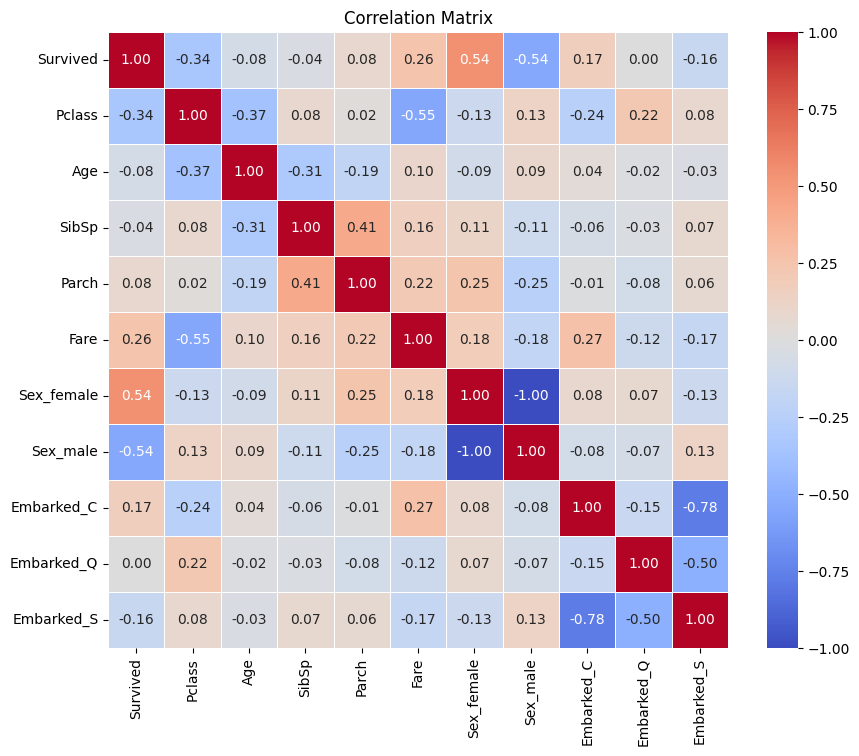

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = train_data.drop(columns='PassengerId').corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [7]:
X = train_data.drop(columns=['PassengerId', 'Survived'])
y = train_data['Survived']

In [8]:
X[X.isna().any(axis=1)]
X.fillna(0, inplace=True)

Accuracy: 0.776536312849162
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.72      0.74      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



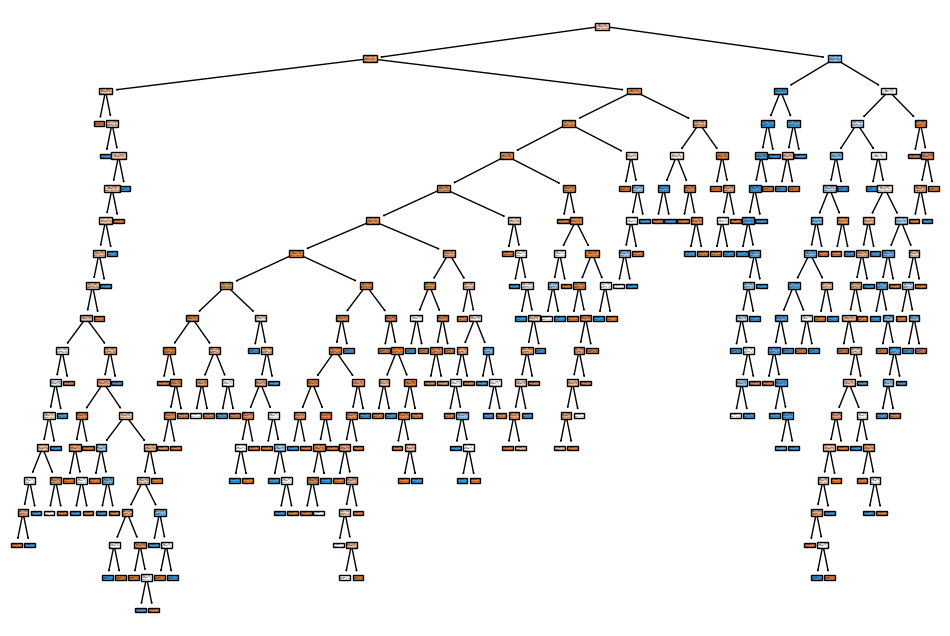

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True)
plt.show()


In [10]:
# make a grid search for the best parameters of the model
# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Define an extensive parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'class_weight': [None, 'balanced']
}

# Perform exhaustive grid search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create a new classifier
best_clf = DecisionTreeClassifier(**best_params)

# Train the classifier on the training data
best_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Fitting 5 folds for each of 2560 candidates, totalling 12800 fits
Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.78      0.92      0.85       105
           1       0.85      0.64      0.73        74

    accuracy                           0.80       179
   macro avg       0.82      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179

[[97  8]
 [27 47]]


c:\Users\Richard\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3200 fits failed out of a total of 12800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1991 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Richard\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Richard\anaconda3\envs\ML\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\Richard\anaconda3\envs\ML\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  Fi

In [11]:
# make an random forrest classifier

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

[[89 16]
 [18 56]]


In [12]:
# make an random forrest classifier with grid search
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced']
}

# Perform grid search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create a new classifier
best_clf = RandomForestClassifier(**best_params)

# Train the classifier on the training data
best_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits
Best Parameters: {'class_weight': None, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 200}
Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.66      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179

[[95 10]
 [25 49]]


In [18]:
# Using pycaret to compare different models

from pycaret.classification import *
clf = setup(data = train_data, target = 'Survived', ignore_features=['sex_male'])
best = compare_models()

,Description,Value
0,Session id,5997
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 12)"
5,Transformed train set shape,"(623, 12)"
6,Transformed test set shape,"(268, 12)"
7,Ignore features,1
8,Numeric features,6
9,Rows with missing values,19.9%


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8217,0.8709,0.7152,0.8019,0.7553,0.6158,0.6190,0.0120
rf,Random Forest Classifier,0.8122,0.8607,0.7154,0.7823,0.7458,0.5975,0.6005,0.0210
et,Extra Trees Classifier,0.8122,0.8624,0.7109,0.7858,0.7437,0.5963,0.6007,0.0180
lightgbm,Light Gradient Boosting Machine,0.8058,0.8576,0.6861,0.7814,0.7297,0.5793,0.5831,0.0460
ridge,Ridge Classifier,0.7913,0.0000,0.6899,0.7495,0.7174,0.5525,0.5548,0.0030
ada,Ada Boost Classifier,0.7913,0.8267,0.7192,0.7359,0.7243,0.5568,0.5602,0.0090
lda,Linear Discriminant Analysis,0.7913,0.8519,0.6899,0.7495,0.7174,0.5525,0.5548,0.0050
lr,Logistic Regression,0.7897,0.8500,0.7024,0.7405,0.7197,0.5517,0.5533,0.0100
nb,Naive Bayes,0.7849,0.8328,0.7319,0.7166,0.7229,0.5474,0.5487,0.0030
xgboost,Extreme Gradient Boosting,0.7833,0.8592,0.6819,0.7385,0.7075,0.5359,0.5384,0.0120


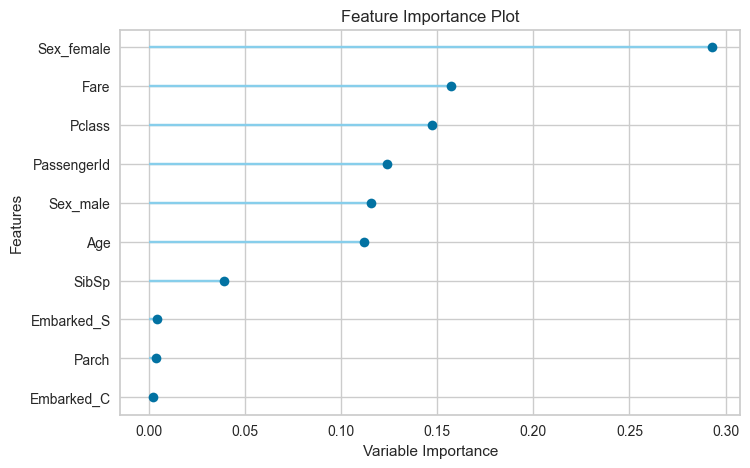

In [19]:
# plot feature importance
plot_model(best, plot = 'feature')

**Structured approach to increase the performance even further**

This section is inspired by the work of [Muhammad Bilal Khan](https://www.kaggle.com/code/devbilalkhan/titanic-beginner-friendly-with-92-accuracy/notebook). 

# Section 1: Data cleaning

Let's take a look at the data and see how we can transform them to improve the performance. 


In [80]:
train_data = pd.read_csv('Data/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
test_data = pd.read_csv('Data/test.csv')
# save the list of passengers for later
pass_id = pd.DataFrame(test_data['PassengerId'])
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In previous runs I have not considered the columns 'name', and 'cabin'. Let's see what I can extract from those columns. 

In [82]:
train_data['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

**Feature creation**

The structure suggest that the title of the passenger always ends with a dot. Let's try and extract that. 

Here I will also use an interpolation method to fill the missing age values.
I will use the median for the titles of the passenger

Following [Niklas Donges](https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8) observation I will also create a category for each deck of the cabin value. 


In [83]:
import re 
for data in [train_data, test_data]:
    # extract the title from the name
    data['title'] = data['Name'].str.extract('([A-Za-z]+)\.', expand=False)

    # replace rare titles with 'Rare'
    rare_titles = ['Dona', 'Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']
    data['title'] = data['title'].replace(rare_titles, 'Rare')

    # fill ages with median of the title
    median_ages = data.groupby('title')['Age'].transform('median')
    data['Age'] = data['Age'].fillna(median_ages)

    # bin the ages into categories
    data['age_group'] = pd.cut(data['Age'], bins=[0, 18, 30, 60, 100], labels=['Child', 'Young', 'Adult', 'Senior'])

    data['Cabin'] = data['Cabin'].fillna("U0")
    data['Deck'] = data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())

    data['sib_par'] = data['SibSp'] + data['Parch']


**Feature transformation**

I will now create numerical features and normalize them. 

In [84]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        891 non-null    object  
 11  Embarked     889 non-null    object  
 12  title        891 non-null    object  
 13  age_group    891 non-null    category
 14  Deck         891 non-null    object  
 15  sib_par      891 non-null    int64   
dtypes: category(1), float64(2), int64(6), object(7)
memory usage: 105.6+ KB


In [85]:
def clean_data(data):
    data = data.drop(columns=['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Cabin', 'Ticket'])
    # one hot encode the categorical variables
    data = pd.get_dummies(data, columns=['title', 'age_group', 'Deck', 'Embarked', 'Sex'], drop_first=True)
    return data

    



In [86]:
train_data = clean_data(train_data)
test_data = clean_data(test_data)
train_data.head()

,Survived,Pclass,Fare,sib_par,title_Miss,title_Mlle,title_Mme,title_Mr,title_Mrs,title_Ms,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Embarked_Q,Embarked_S,Sex_male
0,0,3,7.2500,1,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,True
1,1,1,71.2833,1,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
2,1,3,7.9250,0,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,1,1,53.1000,1,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
4,0,3,8.0500,0,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,True


In [87]:
# make bins for Fare

train_data['Fare'] = pd.qcut(train_data['Fare'], q=4, labels=False)
test_data['Fare'] = pd.qcut(test_data['Fare'], q=4, labels=False)


In [88]:
# add columns that are in train_data but not in test_data to test_data
# differeneces between train_data and test_data columns
# Get the column names of train_data and test_data
train_columns = set(train_data.drop(columns=['Survived']).columns)
test_columns = set(test_data.columns)

# Find the difference in columns between train_data and test_data
columns_difference_train_to_test = train_columns - test_columns
print(columns_difference_train_to_test)
# Add missing columns from train_data to test_data
for column in columns_difference_train_to_test:
    test_data[column] = False

{'title_Mme', 'Deck_T', 'title_Mlle'}


In [89]:
# bring the columns in the same order
test_data = test_data[train_data.drop(columns=['Survived']).columns]

In [90]:

# normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_data[['Fare', 'sib_par', 'Pclass']] = scaler.fit_transform(train_data[['Fare', 'sib_par', 'Pclass']])
test_data[['Fare', 'sib_par', 'Pclass']] = scaler.fit_transform(test_data[['Fare', 'sib_par', 'Pclass']])

In [91]:
# train models using pycaret
# define setup
from pycaret.classification import *
exp_clf101 = setup(data = train_data, target = 'Survived', train_size=0.8, session_id=123)

,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 25)"
4,Transformed data shape,"(891, 25)"
5,Transformed train set shape,"(712, 25)"
6,Transformed test set shape,"(179, 25)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [92]:
# train models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8272,0.0000,0.7394,0.7970,0.7653,0.6290,0.6319,0.0050
gbc,Gradient Boosting Classifier,0.8271,0.8668,0.7171,0.8105,0.7585,0.6250,0.6298,0.0110
rf,Random Forest Classifier,0.8243,0.8443,0.7390,0.7887,0.7596,0.6220,0.6258,0.0230
lda,Linear Discriminant Analysis,0.8243,0.8668,0.7394,0.7904,0.7623,0.6234,0.6260,0.0040
lightgbm,Light Gradient Boosting Machine,0.8215,0.8543,0.7320,0.7892,0.7572,0.6167,0.6199,0.0440
et,Extra Trees Classifier,0.8173,0.8167,0.7175,0.7892,0.7492,0.6063,0.6102,0.0200
dt,Decision Tree Classifier,0.8117,0.7943,0.6952,0.7877,0.7369,0.5915,0.5956,0.0030
xgboost,Extreme Gradient Boosting,0.8089,0.8397,0.7099,0.7747,0.7376,0.5883,0.5924,0.0150
lr,Logistic Regression,0.8061,0.8635,0.7396,0.7524,0.7439,0.5881,0.5904,0.2300
svm,SVM - Linear Kernel,0.8060,0.0000,0.6873,0.7908,0.7188,0.5754,0.5899,0.0040


In [93]:
# evaluate models
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [94]:
train_data

,Survived,Pclass,Fare,sib_par,title_Miss,title_Mlle,title_Mme,title_Mr,title_Mrs,title_Ms,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Embarked_Q,Embarked_S,Sex_male
0,0,1.0,0.000000,0.1,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,True
1,1,0.0,1.000000,0.1,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
2,1,1.0,0.333333,0.0,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,1,0.0,1.000000,0.1,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
4,0,1.0,0.333333,0.0,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.5,0.333333,0.0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
887,1,0.0,0.666667,0.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
888,0,1.0,0.666667,0.3,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
889,1,0.0,0.666667,0.0,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True


In [95]:
# Import necessary libraries
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_data.drop(columns=['Survived']), train_data['Survived'], test_size=0.2, random_state=42)



In [96]:
# Define the parameter grid
param_grid = {
    'n_estimators': [2000, 2500, 3000, 4000],
    'max_depth': [None, 1,2,3,4,5,6,7,8,9,10],
    'min_samples_split': [2],
    'min_samples_leaf': [2],
    'bootstrap': [True]
}
# Initialize Extra Trees classifier
et_classifier = ExtraTreesClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=et_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Get the best model
best_et_classifier = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_et_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 2500}
Accuracy: 0.8324022346368715


In [97]:
# find nan values in rows of test_data
test_data.fillna(0, inplace=True)

In [98]:
y_result = best_et_classifier.predict(test_data)

# add y_result to pass_id
pass_id['Survived'] = y_result

# save to csv
pass_id.to_csv('Result/submission.csv', index=False)

**Upload the final result to kaggle**

In [100]:
# upload prediction to kaggle using kaggle API with command line interface
!kaggle competitions submit -c titanic -f Result/submission.csv -m "Prediction using Extra Trees Classifier"


Successfully submitted to Titanic - Machine Learning from Disaster



  0%|          | 0.00/3.18k [00:00<?, ?B/s]
100%|██████████| 3.18k/3.18k [00:00<00:00, 5.12kB/s]
